In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
# Load the data
data = pd.read_csv('DSL-StrongPasswordData.csv')

In [4]:
# Prepare the features (X) and target (y)
X = data.drop(columns=['subject', 'sessionIndex', 'rep'])  # Exclude non-feature columns
y = data['subject'].astype('category')  # The 'subject' column is the target (user ID)

# Encode the target labels as numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Split the dataset into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1, stratify=y_encoded)

# Standardize the features (normalize the data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the k-NN classifier with Euclidean distance
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [6]:
# Train the k-NN model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test_scaled)

In [7]:
# Evaluate the model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 84.93%


In [8]:
# Get the original category labels for the classification report
target_names = label_encoder.classes_.astype(str)  # Convert to string to avoid TypeError

# Print classification report using the actual category labels
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
               precision    recall  f1-score   support

           2       0.55      0.88      0.67        80
           3       0.84      0.90      0.87        80
           4       0.80      0.86      0.83        80
           5       0.86      0.89      0.87        80
           7       0.71      0.85      0.77        80
           8       0.70      0.78      0.74        80
          10       0.78      0.94      0.85        80
          11       0.92      0.82      0.87        80
          12       0.88      0.84      0.86        80
          13       0.81      0.88      0.84        80
          15       0.88      0.74      0.80        80
          16       0.71      0.97      0.82        80
          17       0.92      0.99      0.95        80
          18       0.95      0.75      0.84        80
          19       0.85      0.96      0.90        80
          20       0.79      0.72      0.76        80
          21       0.76      0.74      0.75        80
  

In [9]:
y_pred_train = knn.predict(X_train_scaled)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train) * 100:.2f}%")

Training Accuracy: 89.96%


In [12]:
import joblib

# Save the trained model
joblib.dump(knn, 'knn_model.pkl')  # Save the model as 'knn_model.pkl'
print("Model saved successfully!")

# Save the scaler as well to use it later during prediction
joblib.dump(scaler, 'scaler_knn.pkl')  # Save the scaler used for normalization
print("Scaler saved successfully!")


Model saved successfully!
Scaler saved successfully!


In [13]:
print(f"Input shape for KNN model: {X_train.shape[1]} features")


Input shape for KNN model: 31 features


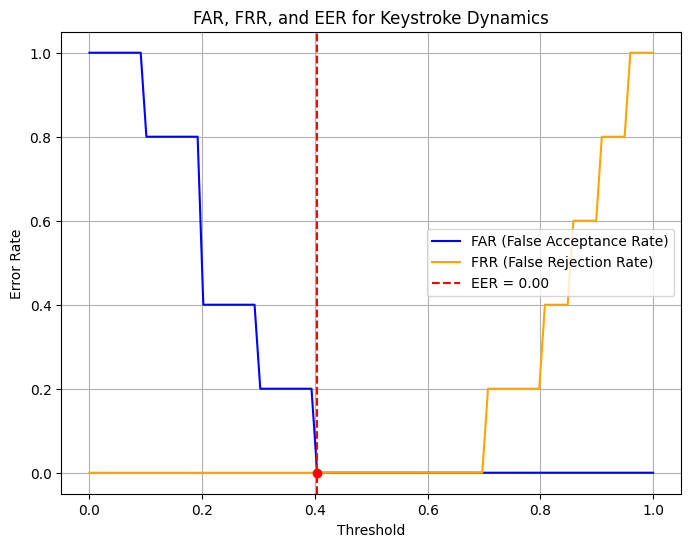

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Function to calculate FAR and FRR at different thresholds
def calculate_far_frr(y_true, y_scores, thresholds):
    far_list = []
    frr_list = []
    for thresh in thresholds:
        y_pred = (y_scores >= thresh).astype(int)
        conf_matrix = confusion_matrix(y_true, y_pred, labels=[1, 0])
        true_positive = conf_matrix[0, 0]
        false_positive = conf_matrix[1, 0]
        false_negative = conf_matrix[0, 1]
        true_negative = conf_matrix[1, 1]
        
        far = false_positive / (false_positive + true_negative) if (false_positive + true_negative) > 0 else 0
        frr = false_negative / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        
        far_list.append(far)
        frr_list.append(frr)
    
    return np.array(far_list), np.array(frr_list)

# Example data (replace with your actual prediction scores and labels)
y_true = np.array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0])  # True labels
y_scores = np.array([0.9, 0.8, 0.4, 0.2, 0.7, 0.1, 0.85, 0.95, 0.3, 0.2])  # Predicted scores

# Thresholds for evaluation
thresholds = np.linspace(0, 1, 100)

# Calculate FAR and FRR
far, frr = calculate_far_frr(y_true, y_scores, thresholds)

# Calculate EER (Equal Error Rate)
eer_threshold = thresholds[np.argmin(np.abs(far - frr))]
eer = far[np.argmin(np.abs(far - frr))]

# Plot the FAR, FRR, and EER
plt.figure(figsize=(8, 6))
plt.plot(thresholds, far, label="FAR (False Acceptance Rate)", color="blue")
plt.plot(thresholds, frr, label="FRR (False Rejection Rate)", color="orange")
plt.axvline(eer_threshold, color="red", linestyle="--", label=f"EER = {eer:.2f}")
plt.scatter([eer_threshold], [eer], color="red", zorder=5)

# Labels and legend
plt.title("FAR, FRR, and EER for Keystroke Dynamics")
plt.xlabel("Threshold")
plt.ylabel("Error Rate")
plt.legend()
plt.grid()
plt.show()
